# Stock Twitter Sentiment

### Flow
* Use snscrape to scrape the tweet as per for training the sentiment analysis model - Historic data minimum 5k tweets more the better  
* For training purpose key word to extract the data - NSE or a perticular stock eg INFY and madete to use location as India 
* Cleaning of tweets eg.stopwords tokanization etc
* Affin or Vaider to label the sentiment for training purpose
* Converting to number by TFIDF 
* If imbalance data - treat it
* Split to train and test 
* Model building - use the best model and save as pickle file
* Use Snscrape to scrape live tweet for the past 2 days
* Finally predict using the trained model
* Deploy 


### Web scrapping for training 

In [4]:
import snscrape.modules.twitter as snstwitter
import snscrape
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


In [21]:
pd.DataFrame (tweet)

,0
0,https://twitter.com/Anirbban/status/1448499495...
1,2021-10-14 04:02:46+00:00
2,#Infy hit 1780+... I have booked ptofit. https...
3,1448499495466012673
4,Anirbban
5,[https://twitter.com/Anirbban/status/144822586...
6,https://twitter.com/Anirbban/status/1448225867...
7,[https://t.co/C1XxlVlQBr]
8,https://t.co/C1XxlVlQBr


In [2]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
# Using enumerate to get the tweet and the index (to break at certain nu7mber of tweets)
for i, tweet in enumerate(snstwitter.TwitterHashtagScraper('SBIN').get_items()):

    # Break @ desired number of tweets
    if i > 20000:
        break

    # Save the required details like content, date in list
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])

# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2,
                          columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

KeyboardInterrupt: 

In [3]:
tweets_df2

,Datetime,Tweet Id,Text,Username
0,2021-10-24 12:00:05+00:00,1452243495914250243,#SBIN - SBIN - TradingView - https://t.co/Rtn...,in_tradingview
1,2021-10-24 11:52:48+00:00,1452241664332926986,Chart story ep #8\n\n👇👇\nhttps://t.co/7OxH7XVo...,HariHarWealth
2,2021-10-24 11:30:05+00:00,1452235944338378759,#SBIN - SBIN Long - TradingView - https://t.co...,in_tradingview
3,2021-10-24 11:29:09+00:00,1452235710820495361,SBIN Long - #SBIN chart on @TradingView https:...,KotadiaNitin
4,2021-10-24 09:01:54+00:00,1452198654710796293,#Sbi 502\n#TataMotors 490 (52 week High Is 530...,Darshanj101
...,...,...,...,...
19996,2019-07-24 02:39:24+00:00,1153857180799504384,#SBIN #intraday \n\nsuccessful short trade in ...,pradytrader1
19997,2019-07-23 20:10:00+00:00,1153759185009385472,#SBIN - Bullish Shark - SBI (Positional) - Tra...,in_tradingview
19998,2019-07-23 17:53:35+00:00,1153724854622756864,"#SBIN #sbi No solace for the bulls, moving sha...",piyushrawtani
19999,2019-07-23 16:03:58+00:00,1153697269822025729,"#Bearish stocks chart- #M_MFin, #Unionbank, #A...",Mr_Chartist


In [4]:
tweets_df2['Text'][50]

'#sbin 498 making low'

In [3]:
tweets_df2.to_csv('SBIN_Stock_tweet.csv')

NameError: name 'tweets_df2' is not defined

### Data Cleaning

In [1]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy


#Lemmatization
wordnet=WordNetLemmatizer()

#Stop word
stop_words=stopwords.words('english')

#Lemitization purpose 
nlp=spacy.load('en_core_web_sm')

In [7]:
df=pd.read_csv('SBIN_Stock_tweet.csv')
df=df.iloc[:,1:]
df.head()


,Datetime,Tweet Id,Text,Username
0,2021-10-24 12:00:05+00:00,1452243495914250243,#SBIN - SBIN - TradingView - https://t.co/Rtn...,in_tradingview
1,2021-10-24 11:52:48+00:00,1452241664332926986,Chart story ep #8\n\n👇👇\nhttps://t.co/7OxH7XVo...,HariHarWealth
2,2021-10-24 11:30:05+00:00,1452235944338378759,#SBIN - SBIN Long - TradingView - https://t.co...,in_tradingview
3,2021-10-24 11:29:09+00:00,1452235710820495361,SBIN Long - #SBIN chart on @TradingView https:...,KotadiaNitin
4,2021-10-24 09:01:54+00:00,1452198654710796293,#Sbi 502\n#TataMotors 490 (52 week High Is 530...,Darshanj101


In [8]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from imblearn.over_sampling import SMOTEN,SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from pickle import dump
from pickle import load
from sklearn.linear_model import LogisticRegression
import streamlit as st
from sklearn.feature_extraction.text import TfidfTransformer

In [9]:
corpus = []
for i in range(0, len(df)):
    
    # Removal of USer Tag eg - @shutter_con
    # Re.sub replace with regular expression
    tweet = re.sub("@[A-Za-z0-9]+"," ",df['Text'][i]) 
        
    # Removal of links 
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    
    # Removal of puntuations
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)

    # Converting Text to Lower case
    tweet = tweet.lower()

    # Spliting each words - eg ['I','was','happy']
    tweet = tweet.split()

    # Applying Lemmitization for the words eg: Argument -> Argue - Using Spacy Library
    tweet = nlp(' '.join(tweet))
    tweet = [token.lemma_ for token in tweet]

    # Removal of stop words
    tweet = [word for word in tweet if word not in stop_words]

    # Joining the words in sentences
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [10]:
corpus[6999]

'buy sbin stop loss target sbin stockstowatch statebankofindia'

In [11]:
df['Text'][6999]

'Buy SBIN above 394.00 Stop Loss 385.00 \n\nTarget 410--415\n\n#SBIN  #StocksToWatch #statebankofindia'

In [12]:
df['Cleaned_text']= corpus
df.head()

,Datetime,Tweet Id,Text,Username,Cleaned_text
0,2021-10-24 12:00:05+00:00,1452243495914250243,#SBIN - SBIN - TradingView - https://t.co/Rtn...,in_tradingview,sbin sbin tradingview
1,2021-10-24 11:52:48+00:00,1452241664332926986,Chart story ep #8\n\n👇👇\nhttps://t.co/7OxH7XVo...,HariHarWealth,chart story ep join free nifty banknifty rvnl ...
2,2021-10-24 11:30:05+00:00,1452235944338378759,#SBIN - SBIN Long - TradingView - https://t.co...,in_tradingview,sbin sbin long tradingview
3,2021-10-24 11:29:09+00:00,1452235710820495361,SBIN Long - #SBIN chart on @TradingView https:...,KotadiaNitin,sbin long sbin chart
4,2021-10-24 09:01:54+00:00,1452198654710796293,#Sbi 502\n#TataMotors 490 (52 week High Is 530...,Darshanj101,sbi tatamotor week high cross first nifty nift...


### Afin

In [13]:
from afinn import Afinn

In [14]:
afnn = Afinn()

In [15]:
scores = [ afnn.score(item) for item in df['Cleaned_text'] ]

# Positive review = 1
# Neutral review = 0
# Negative review = 2

Affin_score = [ 1 if score > 0 
               else 0 if score == 0 
               else 2 for score in scores]


In [16]:
df['Affin_score']=Affin_score


C:\Users\Kevin\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Affin_score', ylabel='count'>

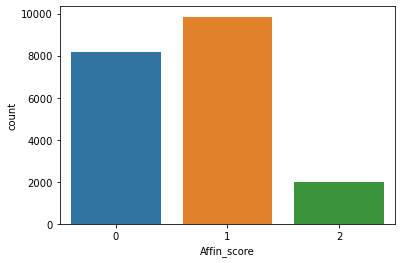

In [17]:
# Data is imbalanced 
sns.countplot(df.Affin_score)

In [18]:
df[df['Affin_score']==1]['Cleaned_text']

2021-10-31 14:29:59.861 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


1        chart story ep join free nifty banknifty rvnl ...
4        sbi tatamotor week high cross first nifty nift...
7        sbin cash monthly weekly ltp good set I prefer...
8        sbin bullish dcb tataconsumer post good result...
10                         screen maam thank bethanie sbin
                               ...                        
19970    sbin unfilled gap range runaway gap could well...
19975    fresh exit sbin pm sl nimblrta amibroker ready...
19983    market look weak since past day I exit sbin po...
19988                         earning yesterday thank sbin
19996         sbin intraday successful short trade sbi jul
Name: Cleaned_text, Length: 9853, dtype: object

In [19]:
df['Cleaned_text'][7000]

'sbin look ce sl sbin sp'

In [20]:
df['Text'][7000]

'SBIN  Now @ 390.40\n\nLook @ 400 CE Now @ 16.80 , SL. 15.30\n\n#sbin #sp'

### Vader

#### Why Vader as it has probability for positive negative and neutral text and its good for social media text

In [21]:
#!pip install vaderSentiment

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
senti =SentimentIntensityAnalyzer()
senti.polarity_scores(df['Cleaned_text'][1])

{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.802}

In [24]:
df['Text'][1]

'Chart story ep #8\n\n👇👇\nhttps://t.co/7OxH7XVoqv\n\nJoin us for free\nhttps://t.co/tiBa7X45UZ\n\n#nifty #banknifty #rvnl #ptc #axisbank #sbi #dlf #cleanscience #ioc #ongc #bhel #coalindia #oilindia #oil #hdfcbank #sbin #TATAPOWER #reliance #PFC #equitasbnk #ntpc #rec #maruti #bel'

In [25]:
enumerate

enumerate

In [26]:
vader_polarity=[]
#positive = 1
#Negative = 2
#Neutural = 0
for i in df['Cleaned_text']:
    polarity = senti.polarity_scores(i)
    
    if polarity['compound']>= 0.05:
        vader_polarity.append(1)
    elif polarity['compound']<= -0.05:
        vader_polarity.append(2)
    else:
        vader_polarity.append(0)

In [27]:
vader_polarity

[0,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,


In [28]:
senti.polarity_scores(df['Cleaned_text'][1])

{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.802}

In [29]:
df['Vader_polarity']=vader_polarity
df.head()

,Datetime,Tweet Id,Text,Username,Cleaned_text,Affin_score,Vader_polarity
0,2021-10-24 12:00:05+00:00,1452243495914250243,#SBIN - SBIN - TradingView - https://t.co/Rtn...,in_tradingview,sbin sbin tradingview,0,0
1,2021-10-24 11:52:48+00:00,1452241664332926986,Chart story ep #8\n\n👇👇\nhttps://t.co/7OxH7XVo...,HariHarWealth,chart story ep join free nifty banknifty rvnl ...,1,1
2,2021-10-24 11:30:05+00:00,1452235944338378759,#SBIN - SBIN Long - TradingView - https://t.co...,in_tradingview,sbin sbin long tradingview,0,0
3,2021-10-24 11:29:09+00:00,1452235710820495361,SBIN Long - #SBIN chart on @TradingView https:...,KotadiaNitin,sbin long sbin chart,0,0
4,2021-10-24 09:01:54+00:00,1452198654710796293,#Sbi 502\n#TataMotors 490 (52 week High Is 530...,Darshanj101,sbi tatamotor week high cross first nifty nift...,1,1


In [30]:
df[df['Vader_polarity']==0]['Text'][3510]


KeyError: 3510

In [ ]:
sns.countplot(df['Vader_polarity'])

### TFIDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [32]:
tfidf =TfidfVectorizer(max_features=10000,ngram_range=(1,3))

corpus_tfidf = tfidf.fit_transform(corpus)

pickle.dump(tfidf,open('Stock_tweet_sent.sav','wb'))

### X and Y variable

In [35]:
X

<20001x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 385045 stored elements in Compressed Sparse Row format>

In [34]:
# Creation of X and Y variable
X = corpus_tfidf
y = df['Vader_polarity']

### SMOTEN

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
# Strategy is used to give a count to the clases eg 3300 obs for class 0
strategy ={0:9800,2:9900}

# Random state is used to get the same observation everytime we run it 
over = SMOTE(sampling_strategy=strategy,random_state=7)
SMOTE()

SMOTE()

In [38]:
#creation of Over sample
X_over,y_over= over.fit_resample(X,y)

C:\Users\Kevin\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vader_polarity', ylabel='count'>

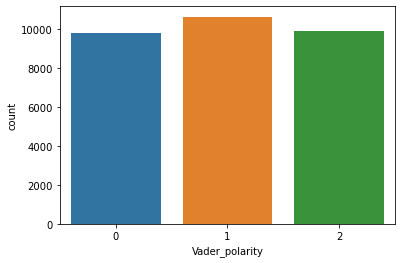

In [39]:
# we can that the data is balaned now and ready for training 
sns.countplot(y_over)

### Split to train and test 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test =train_test_split(X_over, y_over, test_size=0.33, random_state=7)

In [42]:
print("X_train = {} and y_train = {}".format(X_train.shape,y_train.shape))
print("X_test = {} and y_test = {}".format(X_test.shape,y_test.shape))

X_train = (20323, 10000) and y_train = (20323,)
X_test = (10010, 10000) and y_test = (10010,)


### Model Building 

In [43]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import KFold

In [44]:
# custom Fuction to run the model with confusion matrix + Train and test accuracy + F1score
def model_metric(X_train, X_test, y_train, y_test, model, name):

    # predicted for X_train and X_test
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    # Accuracy
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)

    # F1score
#     f1_score = metrics.f1_score(y_train, predict_train)

    print('Accuracy for Train set {}'.format(accuracy_train))
    print('Accuracy for Test set {}'.format(accuracy_test))
#     print('Fi Score {}'.format(f1_score))
    
    print(classification_report(y_test, predict_test))

    plot_confusion_matrix(estimator=model,
                          X=X_test,
                          y_true=y_test,
                          cmap='Blues')
    plt.grid(False)
    plt.title('{} - Confusion Matrix on Test set'.format(name))

#### SVM

In [45]:
model_svc = SVC(C=5, kernel='linear', gamma=1)
model_svc.fit(X_train, y_train)



SVC(C=5, gamma=1, kernel='linear')

In [49]:
pickle.dump(model_svc,open('Stock_tweet_sentiment_SVC_model.sav','wb'))

Accuracy for Train set 0.9946366186094573
Accuracy for Test set 0.9608391608391609
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3201
           1       0.98      0.93      0.96      3550
           2       0.96      0.98      0.97      3259

    accuracy                           0.96     10010
   macro avg       0.96      0.96      0.96     10010
weighted avg       0.96      0.96      0.96     10010



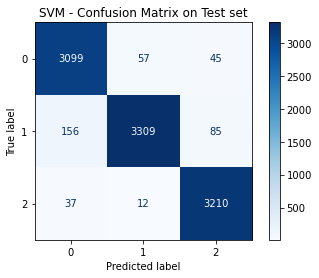

In [46]:
model_metric(X_train,X_test,y_train,y_test,model_svc,name='SVM')

#### Logistic Regression

In [97]:
model_LogR =LogisticRegression(solver='lbfgs', max_iter=500, multi_class='multinomial')
model_LogR.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

Accuracy for Train set 0.9698371303449294
Accuracy for Test set 0.9404595404595405
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3201
           1       0.97      0.90      0.93      3550
           2       0.94      0.96      0.95      3259

    accuracy                           0.94     10010
   macro avg       0.94      0.94      0.94     10010
weighted avg       0.94      0.94      0.94     10010



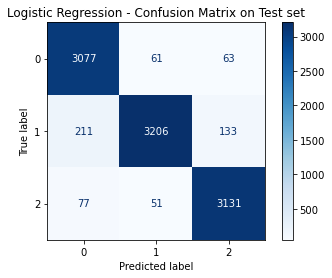

In [98]:
model_metric(X_train,X_test,y_train,y_test,model_LogR,name='Logistic Regression')

#### Linear SVC

In [100]:
model_L_SVC=LinearSVC()
model_L_SVC.fit(X_train, y_train)

LinearSVC()

Accuracy for Train set 0.9698371303449294
Accuracy for Test set 0.9404595404595405
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3201
           1       0.97      0.90      0.93      3550
           2       0.94      0.96      0.95      3259

    accuracy                           0.94     10010
   macro avg       0.94      0.94      0.94     10010
weighted avg       0.94      0.94      0.94     10010



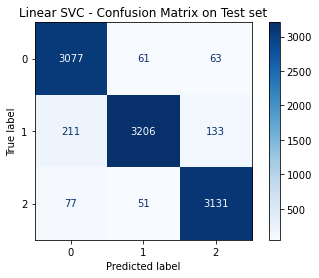

In [101]:
model_metric(X_train,X_test,y_train,y_test,model_LogR,name='Linear SVC')